In [130]:
import os
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.dates as mdates

from datetime import datetime, timedelta

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [117]:
#import dataset
df = pd.read_csv('df_bike_example.csv', index_col='Date')
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
df

,Rented_Bikes,Temperature,Humidity_percent
Date,,,
2017-12-01,9539,-2.454167,45.875000
2017-12-02,8523,1.325000,61.958333
2017-12-03,7222,4.875000,81.541667
2017-12-04,8729,-0.304167,52.500000
2017-12-05,8307,-4.458333,36.416667
...,...,...,...
2018-11-26,17162,6.320833,70.500000
2018-11-27,16282,7.066667,68.000000
2018-11-28,16524,5.304167,25.791667


In [118]:
#for ARIMA modles we don't neet the other variables
df = df[['Rented_Bikes']]

In [119]:
#train and test slice
pred_from = datetime(2018,10,1)
pred_until = datetime(2018,11,30)

df_train = df[:pred_from - timedelta(days=1)]
df_test = df[pred_from:]

In [106]:
#create AR(2) model 
model = ARIMA(df_train, order=(2,0,0))
model_fit = model.fit()

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred

In [107]:
pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred

/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Date'>

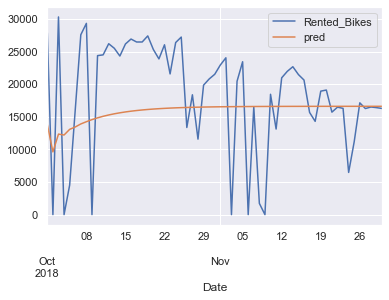

In [108]:
#plot predictions vs. actual values 
df_test.plot()


In [109]:
sqrt(mean_squared_error(df_test['Rented_Bikes'], df_test['pred']))

8686.75414713029

In [128]:
def my_model(p,q,d):
    model = ARIMA(df_train, order=(p,d,q))
    model_fit = model.fit()
    pred = model_fit.predict(start=pred_from, end=pred_until)
    rmse = sqrt(mean_squared_error(df_test['Rented_Bikes'], pred))
    print(rmse, p, q, d)

In [132]:
for p in range(1,5): 
        for d in range(0,3): 
                for q in range(1,3): 
                     my_model(p,q,d)   

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  wa

8553.823235089774 1 1 0
8524.797054631574 1 2 0


/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred

19846.57325060832 1 1 1
19834.70106636786 1 2 1


/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.